Name: Venkata Avinash

# Homework 5

## Logistic Regression

*Logistic regression is used to find the probability of event=Success and event=Failure. We should use logistic regression when the dependent variable is binary (0/ 1, True/ False, Yes/ No) in nature. Here the value of Y ranges from 0 to 1 and it can represented by following equation.*

**odds= p/ (1-p) = probability of event occurrence / probability of no event occurrence**

**ln(odds) = ln(p/(1-p))**

**logit(p) = ln(p/(1-p)) = b0+b1X1+b2X2+b3X3....+bkXk**

*Above, p is the probability of presence of the characteristic of interest. A question that you should ask here is “why have we used log in the equation?”.*

*Since we are working here with a binomial distribution (dependent variable), we need to choose a link function which is best suited for this distribution. And, it is logit function. In the equation above, the parameters are chosen to maximize the likelihood of observing the sample values rather than minimizing the sum of squared errors (like in ordinary regression).*



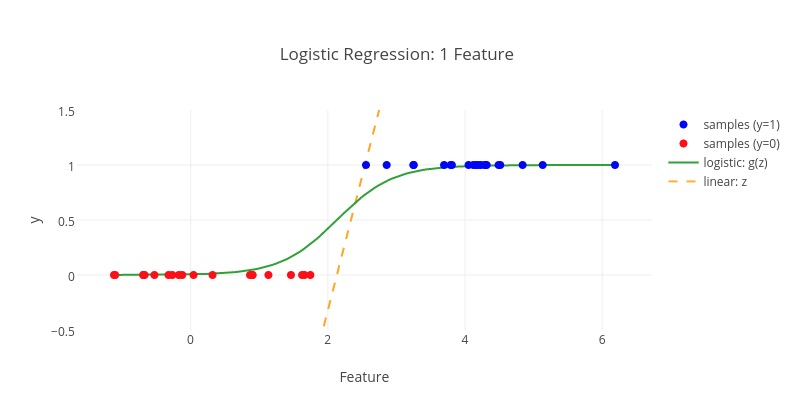

In [7]:
from IPython.display import Image
Image (filename="log.png")

*Logistic regression is named for the function used at the core of the method, the logistic function. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic Regression is used when response variable is categorical in nature.*

*The logistic function, also called the sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.*


*Logistic regression uses an equation as the representation, similar to linear regression. The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear(read: straight) boundary. Your data must be linearly seperable in n dimensions*



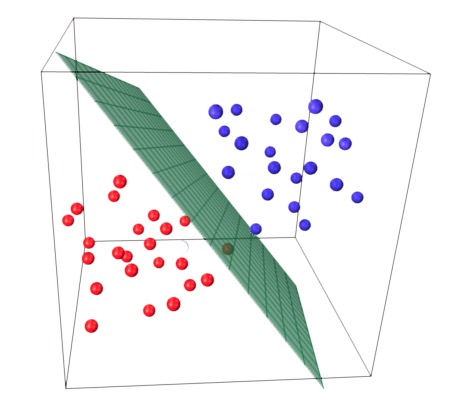

In [8]:

Image(filename="log2.png")

**Important Points:**
- It is widely used for **classification** problems
- Logistic regression doesn’t require linear relationship between dependent and independent variables.  It can handle various types of relationships because it applies a non-linear log transformation to the predicted odds ratio
- To avoid over fitting and under fitting, we should include all significant variables. A good approach to ensure this practice is to use a step wise method to estimate the logistic regression
- It requires **large sample sizes** because maximum likelihood estimates are less powerful at low sample sizes than ordinary least square
- The independent variables should not be correlated with each other i.e. **no multi collinearity.** However, we have the options to include interaction effects of categorical variables in the analysis and in the model.
- If the values of dependent variable is ordinal, then it is called as **Ordinal logistic regression**
- If dependent variable is multi class then it is known as **Multinomial Logistic regression.**

In [1]:
#Importing libraries.
import numpy as np
import pandas as pd
import random
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

**Dataset : Wine recognition data**

*These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.The analysis determined the quantities of 13 constituents found in each of the three types of wines.*

In [2]:
# ### Load and prepare the wine dataset

# read in the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url, header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# examine the response variable
wine[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [4]:
# define X and y
X = wine.drop(0, axis=1)
y = wine[0]

In [6]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# ### Logistic regression (unregularized)

# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
# examine the coefficients
print(logreg.coef_)

[[ -3.78736769e+00   4.67404435e+00   1.35566674e+01  -2.56780208e+00
    9.94234266e-02  -4.66366672e+00   9.32254676e+00   2.64475215e+00
   -1.02529022e+01  -2.15290823e+00  -1.62698597e+00   6.48024952e+00
    6.18085493e-02]
 [  6.51497931e+00  -6.32567232e+00  -2.10346336e+01   2.04206275e+00
    8.21697639e-03   3.00794699e+00   6.04048700e+00   3.27672865e+00
    7.09827242e+00  -9.51649745e+00   4.02292480e+00  -8.89168128e+00
   -5.84955207e-02]
 [ -9.70213425e-01   2.08271772e+00   9.41518259e-01   2.38015929e-01
   -2.49625850e-03  -9.80976091e-01  -6.54884298e+00  -4.83304557e-01
   -2.65889488e+00   2.57460650e+00  -1.30416276e+00  -2.34299280e+00
    9.48532261e-03]]


In [9]:
# generate predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)
print(y_pred_prob)

[[  3.74367140e-09   2.77280287e-12   9.99999996e-01]
 [  1.92307711e-15   1.00000000e+00   4.32233774e-10]
 [  9.99999906e-01   1.64538949e-13   9.37827691e-08]
 [  4.56199707e-08   9.99999830e-01   1.24112647e-07]
 [  9.99730799e-01   1.36949166e-25   2.69201406e-04]
 [  4.73996999e-13   3.59037244e-08   9.99999964e-01]
 [  9.99842418e-01   1.12959212e-06   1.56452095e-04]
 [  9.99999720e-01   1.16008720e-28   2.80169301e-07]
 [  1.36326031e-15   4.67735396e-16   1.00000000e+00]
 [  7.02023413e-15   9.99997008e-01   2.99209787e-06]
 [  9.99967659e-01   9.98581869e-15   3.23408886e-05]
 [  9.92807472e-01   7.19230165e-03   2.26351122e-07]
 [  3.65399753e-18   1.00000000e+00   1.12558699e-10]
 [  9.99999998e-01   2.08746436e-16   1.72639210e-09]
 [  2.72089648e-08   9.99999972e-01   3.47691766e-10]
 [  8.79275722e-14   9.99999959e-01   4.13218799e-08]
 [  2.51842280e-26   4.58258536e-01   5.41741464e-01]
 [  9.99994386e-01   5.58697696e-06   2.65299468e-08]
 [  9.71667813e-13   9.99999

In [10]:
# calculate log loss
print('Log loss (no penalty) =',metrics.log_loss(y_test, y_pred_prob))

Log loss (no penalty) = 0.404198941498


In [13]:
y_pred = logreg.predict(X_test)
# Access accuracy
print('Accuracy (no penalty) =', metrics.accuracy_score(y_test, y_pred))

Accuracy (no penalty) = 0.955555555556


In [15]:
# ### Logistic regression (regularized)
# - **C:** must be positive, decrease for more regularization
# - **penalty:** l1 (lasso) or l2 (ridge)

# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression With L1 Penalty

In [16]:
# logistic regression with L1 penalty (C must be positive, smaller means more regularization)
# try C=0.1 with L1 penalty
logreg = LogisticRegression(C=0.1, penalty='l1')
logreg.fit(X_train_scaled, y_train)
print(logreg.coef_)

[[ 0.21031904  0.          0.          0.          0.          0.
   0.48878885  0.          0.          0.          0.          0.15167683
   1.47744073]
 [-0.65696892 -0.05643186 -0.11388972  0.          0.          0.          0.
   0.          0.         -0.7386228   0.24358768  0.         -0.6340503 ]
 [ 0.          0.          0.          0.          0.          0.
  -0.84213403  0.          0.          0.61549502 -0.49012227 -0.30451803
   0.        ]]


In [18]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X_test_scaled)
print('Log Loss (L1 penalty) =',metrics.log_loss(y_test, y_pred_prob))

Log Loss (L1 penalty) = 0.362243909137


In [20]:
y_pred_l1 = logreg.predict(X_test_scaled)
# Access accuracy
print('Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1))

Accuracy (L1 penalty) = 0.977777777778


#### Logistic Regression With L2 Penalty 

In [21]:
# logistic regression with L2 penalty (C must be positive, smaller means more regularization)
# try C=0.1 with L2 penalty
logreg = LogisticRegression(C=0.1, penalty='l2')
logreg.fit(X_train_scaled, y_train)
print(logreg.coef_)

[[ 0.59163934  0.06886667  0.33592964 -0.49616684  0.111539    0.21570086
   0.40524509 -0.15526139 -0.02534651  0.05399014  0.14877346  0.42327938
   0.89815007]
 [-0.73545676 -0.32942948 -0.47995296  0.294866   -0.1500246   0.04264373
   0.14500586  0.07250763  0.17409795 -0.70726652  0.4128986   0.09997212
  -0.81284365]
 [ 0.20136567  0.30989025  0.15977925  0.18867218  0.04204443 -0.27108109
  -0.55886639  0.07486943 -0.17471153  0.68266464 -0.52385748 -0.49566967
  -0.02565631]]


In [30]:
# generate predicted probabilities and calculate log loss
y_pred_prob = logreg.predict_proba(X_test_scaled)
print('Log Loss (L1 penalty) =',metrics.log_loss(y_test, y_pred_prob))

Log Loss (L1 penalty) = 0.244588324539


In [31]:
y_pred_l2 = logreg.predict(X_test_scaled)
# Access accuracy
print('Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2))

Accuracy (L2 penalty) = 1.0


In [32]:
# pipeline of StandardScaler and LogisticRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [40]:
# grid search for best combination of C and penalty
from sklearn.grid_search import GridSearchCV
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l1', 'l2']
param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_log_loss')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'logisticregression__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='neg_log_loss',
       verbose=0)

In [37]:
# print all log loss scores
grid.grid_scores_

[mean: -1.09861, std: 0.00000, params: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'},
 mean: -0.62547, std: 0.03037, params: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'},
 mean: -0.35490, std: 0.06892, params: {'logisticregression__C': 0.10000000000000001, 'logisticregression__penalty': 'l1'},
 mean: -0.26801, std: 0.04840, params: {'logisticregression__C': 0.10000000000000001, 'logisticregression__penalty': 'l2'},
 mean: -0.09437, std: 0.06114, params: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1'},
 mean: -0.10371, std: 0.04894, params: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'},
 mean: -0.05891, std: 0.06492, params: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l1'},
 mean: -0.06174, std: 0.05651, params: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'},
 mean: -0.07036, std: 0.09876, params: {'logisticregression__C': 100.0, 'logisticregression__penalty

In [39]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

-0.05890603959490997
{'logisticregression__C': 10.0, 'logisticregression__penalty': 'l1'}


#### Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a *regularization* term in order to prevent the coefficients to fit so perfectly to overfit. The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights.As follows:

#### L1 regularization on least squares:

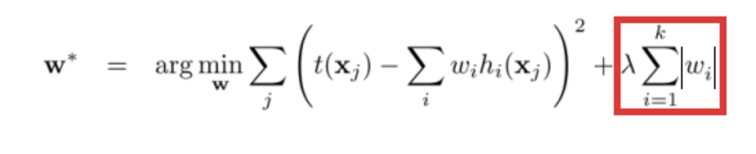

In [9]:
Image(filename="L1.png")

#### L2 regularization on least squares:

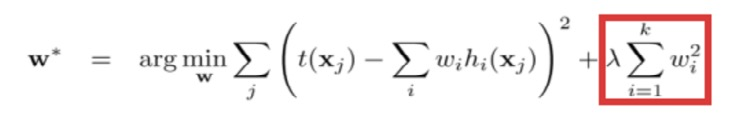

In [10]:
Image(filename="L2.png")

#### The difference between their properties can be promptly summarized as follows:

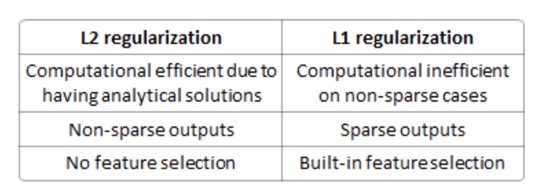

In [11]:
Image(filename="diff.png")

C=100.00
Sparsity with L1 penalty: 4.69%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9093
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8625
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


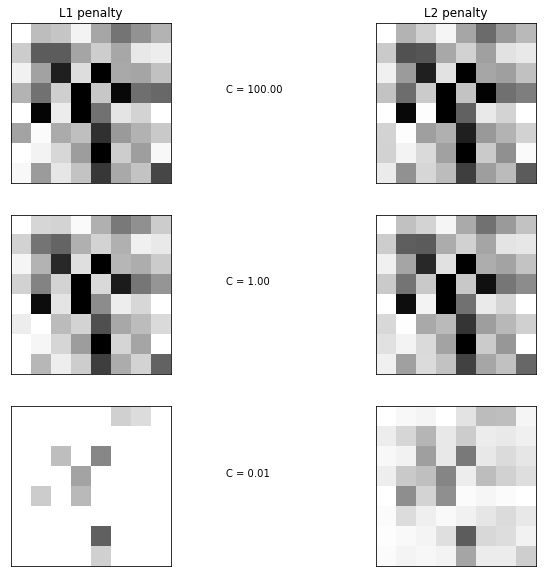

In [51]:
digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

 **Advantages of regularized linear models:**
 
 - Better performance
 - L1 regularization performs automatic feature selection
 - Useful for high-dimensional problems (p > n)

**Disadvantages of regularized linear models:**
 
 - Tuning is required
 - Feature scaling is recommended
 - Less interpretable (due to feature scaling)

**References**:

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py
- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/